<a href="https://colab.research.google.com/github/bulatych/ML_HSE/blob/main/homeworks/HW_5_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First of all, a few notes:
* This work is a sequel to the previous homework assignment (HW-4 ENCODE).
* It is assumed that in HW-4 you successeeded in data processing of ChIP-seq and ATAC-seq experiments. If you failed to do so or just didn't have time to complete HW-4, please contact me in Telegram, I will give data you can work with in this homework.
* Comment and describe! To give you a high grade, we need to understand that you interpreted all results correctly.

Remember to submit the feedback! Especially if the homework was too difficult or easy for you.

A cat image to get you throught this homework:

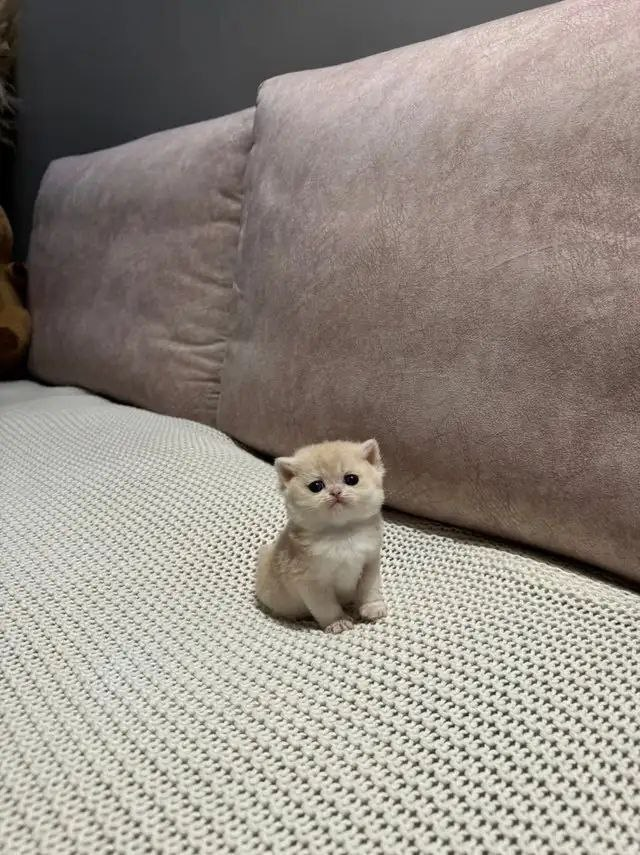

<font color=#c30>**Now you are ready.**</font>

# Introduction

## Target transcription factors

In HW-4, you were asked to choose three ChIP-seq experiments and one ATAC-seq experiment from some cell line. Please list the names of TFs and the cell line.

* Cell line: K562
* TF-1: CTCF
* TF-2: EP300
* TF-3: POLR2A





<font color=#c30>**[0.5]**</font> Load your data and make train/test split.

Make sure that after this section, you have the following:
* `Xtrain`/`Xtest` - table with k-mers, features for our sequences
* `Ytrain`/`Ytest` - table with 4 one-hot-encoded columns, one for each class (background + 3 TFs)

Also, some asserts for you to check if everything is fine with your dataset.

In [1]:

import pandas as pd
df = pd.read_csv('transcription_factors_kmer.csv')

print(df.head())


          C         A         G         T        CA        AG        GT  \
0  0.381228  0.098494  0.400927  0.119351  0.041763  0.045244  0.044084   
1  0.299838  0.228525  0.282010  0.189627  0.074675  0.099026  0.034091   
2  0.329268  0.158537  0.313415  0.198780  0.050061  0.056166  0.034188   
3  0.177536  0.173913  0.417572  0.230978  0.045331  0.106981  0.086129   
4  0.373167  0.135630  0.379032  0.112170  0.051357  0.068232  0.028613   

         TC        CC        CT  ...  TAATC  TCATA  AGCTA  CTATT  TAACG  \
0  0.056845  0.134571  0.058005  ...    0.0    0.0    0.0    0.0    0.0   
1  0.068182  0.113636  0.097403  ...    0.0    0.0    0.0    0.0    0.0   
2  0.067155  0.109890  0.083028  ...    0.0    0.0    0.0    0.0    0.0   
3  0.050771  0.021759  0.064370  ...    0.0    0.0    0.0    0.0    0.0   
4  0.042553  0.142333  0.057227  ...    0.0    0.0    0.0    0.0    0.0   

   TAGTG  TCAAT  ATAAT  CGTAC  ACGTA  
0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0

In [2]:
# Sanity check for labels
df['Class'].value_counts()

,count
Class,
0,8000
1,2000
2,2000
3,2000


In [3]:
df['Class'].dtype
# Проверка уникальных значений в Class
print(df['Class'].unique())

[0 1 2 3]


In [4]:
assert df['Class'].nunique() == 4, "Something is wrong with the number of your classes"
# Ignore below if you have different maximum length of k-mers
assert df.shape[1] == 1365, "Do you have 1364 columns for k-mers and 1 for class?"
assert (df.drop(['Class'], axis=1).dtypes == 'float64').sum() == 1364, "Some of k-mer columns are not float values"
assert (df['Class'].dtype == 'int64') == True, "Your class column have non-integer values"

In [5]:
df.fillna(0, inplace=True)

# Извлечение целевой переменной и признаков
Y = df.pop('Class').values  # Целевая переменная
X = df.values  # Признаки
features = df.columns.values  # Названия признаков



In [ ]:
df

,C,A,G,T,CA,AG,GT,TC,CC,CT,...,TAATC,TCATA,AGCTA,CTATT,TAACG,TAGTG,TCAAT,ATAAT,CGTAC,ACGTA
0,0.381228,0.098494,0.400927,0.119351,0.041763,0.045244,0.044084,0.056845,0.134571,0.058005,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
1,0.299838,0.228525,0.282010,0.189627,0.074675,0.099026,0.034091,0.068182,0.113636,0.097403,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.329268,0.158537,0.313415,0.198780,0.050061,0.056166,0.034188,0.067155,0.109890,0.083028,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
3,0.177536,0.173913,0.417572,0.230978,0.045331,0.106981,0.086129,0.050771,0.021759,0.064370,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.373167,0.135630,0.379032,0.112170,0.051357,0.068232,0.028613,0.042553,0.142333,0.057227,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0.090909,0.227273,0.500000,0.181818,0.000000,0.190476,0.095238,0.047619,0.000000,0.095238,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
13996,0.273148,0.199074,0.356481,0.171296,0.069767,0.079070,0.055814,0.065116,0.083721,0.041860,...,0.0,0.004717,0.0,0.0,0.0,0.004717,0.0,0.0,0.0,0.000000
13997,0.417722,0.105485,0.185654,0.291139,0.067797,0.050847,0.042373,0.173729,0.165254,0.173729,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
13998,0.188679,0.240566,0.339623,0.231132,0.052133,0.099526,0.042654,0.061611,0.014218,0.071090,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000


In [6]:
from sklearn.model_selection import  train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    X, Y, stratify=Y, test_size=0.3, random_state=123
)

print("Train:")
print(f"\tX: {Xtrain.shape}; Y: {Ytrain.shape}")
print("Test:")
print(f"\tX: {Xtest.shape}; Y: {Ytest.shape}")

Train:
	X: (9800, 1364); Y: (9800,)
Test:
	X: (4200, 1364); Y: (4200,)


## Model training <font color=#c30>**[5]**</font>

Time to train our fit-predict skills!

<font color=#c30>**[0.5]**</font> Select proper target metric(s). Do you want to use micro- or macro-averaging? Justify your choice.

<font color=#c30>**[1]**</font> Make sure you understand your multiclassification strategy. Briefly explain differences between One-Vs-Rest (One-Vs-All) and One-Vs-One strategies. Does every model from the list below supports multiclass classification, or do you need to wrap something into multiclass wrappers (OVR/OVO)? Check the links below for more info.

  * <font color=#c30>**[ ! ]**</font> In the context of our task, we are working with **Multiclass classification**, NOT multilabel classification! (Make sure you understand the difference)

  * <font color=#c30>**[ ! ]**</font> For the sake of simplicity, choose One-Vs-Rest strategy.

  * Which models support multiclass classification: https://scikit-learn.org/1.5/modules/multiclass.html
  * OVO wrapper if you need it: https://scikit-learn.org/1.5/modules/generated/sklearn.multiclass.OneVsOneClassifier.html
  * OVR wrapper if you need it: https://scikit-learn.org/1.5/modules/generated/sklearn.multiclass.OneVsRestClassifier.html



Your answer:

I will use micro-averaging. A micro-average will aggregate the contributions of all classes to compute the average metric. Micro average is calculated by taking the total number of true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN) and then using these counts to calculate metrics.
It's more preferable when might be class imbalance. In my case there is a disbalance between classes. There are too much for background  against foreground (8000 vs 2000).

To justify model's quality I will use recall, preison, F1 score. Accuracy will not be used because the samples are not balanced and this will lead to incorrect interpretation of the results.

**Multiclass classification** is a classification task with more than two classes. Each sample can only be labeled as one class.

**One-Vs-One**

OVO classifier is trained for every possible pair of classes. Each pair combination would become an individual binary classifier that in the end aggregated together.

More sensitive to class distinctions, better suited for cases where classes are closely related since each model focuses on a binary distinction between pairs of classes.

Generally, the model uses a voting system where each pairwise classifier votes and the class with the most votes is selected.


**One-Vs-Rest**

OVR is a strategy where we would train binary classifiers for each unique class against the rest in the multi-class dataset. Each of the binary classifiers would be trained upon one unique class and try to separate them from the other classes.

Less computationally intensive than OvO, especially with a large number of classes; often works well with highly imbalanced datasets.

Logistic regression, KNN, Decision tree, Random Forest **support** multiclass classification natively

SVMs are inherently designed for binary classification, but they can be extended to handle multiclass problems using one of the strategies: OVR or OVO

<font color=#c30>**[3]**</font> Train and optimize hyperparameters for the following models:
  * ✅ Logistic regression
  * ✅ KNN
  * ✅ Decision tree
  * ✅ Random Forest
  * ❌ (Optional) SVM
  * ❌ (Optional) Any Gradient Boosting implementation

  * <font color=#c30>**[ ! ]**</font> Take note that algoritmhs like SVM with nonlinear kernel will take A LOT OF TIME to train. During long calculcations, Google Colab might drop your session and you will lose your progress. To counter it, either subsample your data, make smaller grid or skip the algorithm completely (just don't delete the cell with the code and it's output).



## Logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split
import pandas as pd
import joblib

param_grid = {
    'C': [0.1, 0.5, 1],  # Extended range of regularization
    'solver': ['saga'],  # Optimization algorithms
    'penalty': ['l2', 'elasticnet'],  # Type of regularization
    'l1_ratio': [0.5]  # Different values for elasticnet
}

# Logistic regression model
model_logr = LogisticRegression(multi_class='ovr', max_iter=1000, n_jobs=-1)
# Gridsearch
grid_search = GridSearchCV(model_logr, param_grid,
                           scoring='f1_micro', cv=5,
                           verbose=1)

grid_search.fit(Xtrain, Ytrain)


print("Лучшие параметры:", grid_search.best_params_)
print("Лучший f1_micro:", grid_search.best_score_)

# Saving the best model
best_log_model = grid_search.best_estimator_
joblib.dump(best_log_model, "best_logistic_model.pkl")
print("Лучшая модель сохранена в файл best_logistic_model.pkl.")



Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-pac

Лучшие параметры: {'C': 1, 'l1_ratio': 0.5, 'penalty': 'l2', 'solver': 'saga'}
Лучший f1_micro: 0.5818367346938775
Лучшая модель сохранена в файл best_logistic_model.pkl.


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
model_file = "best_logistic_model.pkl"  # Укажите путь к вашему файлу
model_log = joblib.load(model_file)
# Предсказание на тестовой выборке
Ypred_log = model_log.predict(Xtest)

# Metrics
precision = precision_score(Ytest, Ypred_log, average='micro')  # Изменено на 'macro'
recall = recall_score(Ytest, Ypred_log, average='micro')  # Изменено на 'macro'
f1 = f1_score(Ytest, Ypred_log, average='micro')  # Изменено на 'macro'

results = {
    "Best Params": grid_search.best_params_,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
}

# Model estimation
print("\nЛогистическая регрессия:")
print(f"  Best Params: {results['Best Params']}")
print(f"  Precision: {results['Precision']:.4f}")
print(f"  Recall: {results['Recall']:.4f}")
print(f"  F1-Score: {results['F1-Score']:.4f}")

print("Confusion matrix:\n", confusion_matrix(Ytest, Ypred_log))
print("\nОтчет о классификации:\n", classification_report(Ytest, Ypred_log))


Логистическая регрессия:
  Best Params: {'C': 1, 'l1_ratio': 0.5, 'penalty': 'l2', 'solver': 'saga'}
  Precision: 0.5826
  Recall: 0.5826
  F1-Score: 0.5826
Confusion matrix:
 [[2398    0    2    0]
 [ 584    3    9    4]
 [ 553    3   42    2]
 [ 575    1   20    4]]

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.58      1.00      0.74      2400
           1       0.43      0.01      0.01       600
           2       0.58      0.07      0.12       600
           3       0.40      0.01      0.01       600

    accuracy                           0.58      4200
   macro avg       0.50      0.27      0.22      4200
weighted avg       0.53      0.58      0.44      4200



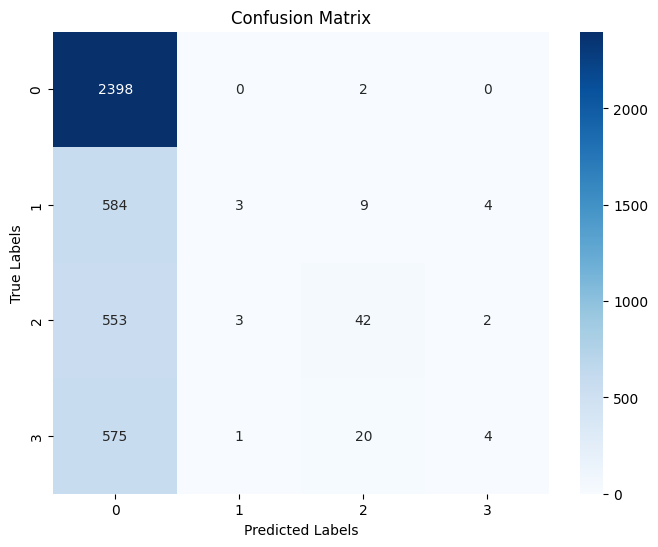

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Confusion matrix
cm_log = confusion_matrix(Ytest, Ypred_log)
class_labels = np.unique(Ytest)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

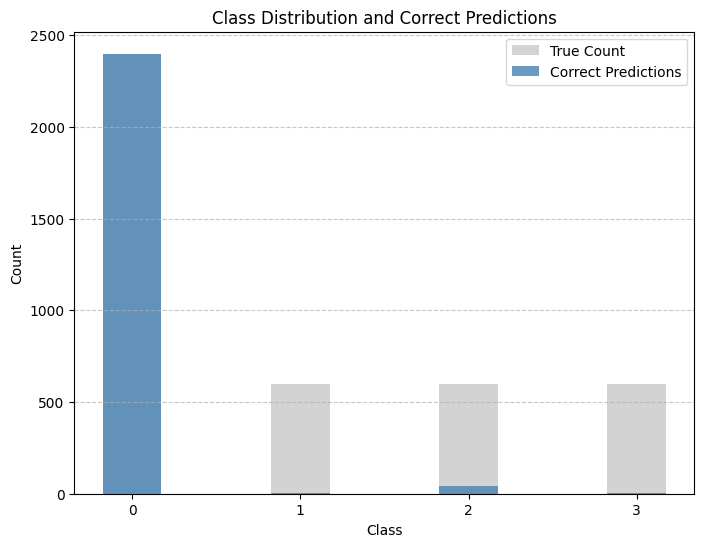

In [36]:
# Частота встречаемости классов и правильно классифицированных
class_counts = np.bincount(Ytest)
correct_predictions = np.array([cm_log[i, i] for i in range(len(class_labels))])

plt.figure(figsize=(8, 6))
bar_width = 0.35
x = np.arange(len(class_labels))

# Полосы для общего числа примеров и правильно предсказанных
plt.bar(x, class_counts, width=bar_width, label="True Count", color="lightgrey")
plt.bar(x, correct_predictions, width=bar_width, label="Correct Predictions", color="steelblue", alpha=0.8)

plt.xticks(x, class_labels)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution and Correct Predictions")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## KNN

In [37]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
import joblib  # Импортируем библиотеку joblib для сохранения модели

# Параметры для оптимизации
grid_knn = {
    'n_neighbors': [3, 7, 15, 25],  # Количество ближайших соседей
    'weights': ['uniform', 'distance'],  # Равные веса или вес по расстоянию
    'metric': ['euclidean', 'manhattan']  # Метрики расстояния
}

# Создаем модель KNN
knn_model = KNeighborsClassifier()

# Настройка GridSearchCV
knn_cv = GridSearchCV(knn_model, grid_knn, scoring='f1_micro', cv=3, n_jobs=-1)  # Используем 'f1_micro'

# Обучение модели
knn_cv.fit(Xtrain, Ytrain)

# Результаты
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Best micro-averaged F1 score:", knn_cv.best_score_)


# Сохранение лучшей модели на диск
best_knn_model = knn_cv.best_estimator_
joblib.dump(best_knn_model, "best_knn_model.pkl")
print("Лучшая модель KNN сохранена в файл best_knn_model.pkl.")



Tuned hyperparameters (best parameters): {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best micro-averaged F1 score: 0.6157145068054529
Лучшая модель KNN сохранена в файл best_knn_model.pkl.


In [38]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Прогнозы
Ypred_knn = best_knn_model.predict(Xtest)

# Метрики
precision_micro = precision_score(Ytest, Ypred_knn, average='micro', zero_division=0)
recall_micro = recall_score(Ytest, Ypred_knn, average='micro', zero_division=0)
f1_micro = f1_score(Ytest, Ypred_knn, average='micro', zero_division=0)

print("\nMetrics (Micro Averaging):")
print(f"Precision (micro): {precision_micro:.4f}")
print(f"Recall (micro): {recall_micro:.4f}")
print(f"F1-Score (micro): {f1_micro:.4f}")

# Отчет по классам
print("\nClassification Report:")
print(classification_report(Ytest, Ypred_knn, zero_division=0))
print("Confusion matrix:\n", confusion_matrix(Ytest, Ypred_knn))



Metrics (Micro Averaging):
Precision (micro): 0.6210
Recall (micro): 0.6210
F1-Score (micro): 0.6210

Classification Report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      2400
           1       0.46      0.12      0.19       600
           2       0.48      0.15      0.23       600
           3       0.39      0.09      0.15       600

    accuracy                           0.62      4200
   macro avg       0.49      0.34      0.34      4200
weighted avg       0.56      0.62      0.53      4200

Confusion matrix:
 [[2393    2    2    3]
 [ 447   71   48   34]
 [ 413   50   90   47]
 [ 465   32   49   54]]


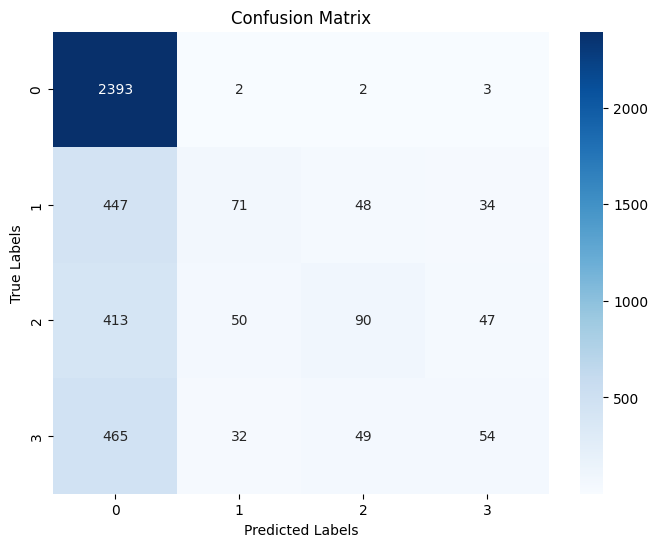

In [39]:
# Матрица путаницы
cm_knn = confusion_matrix(Ytest, Ypred_knn)
class_labels = np.unique(Ytest)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


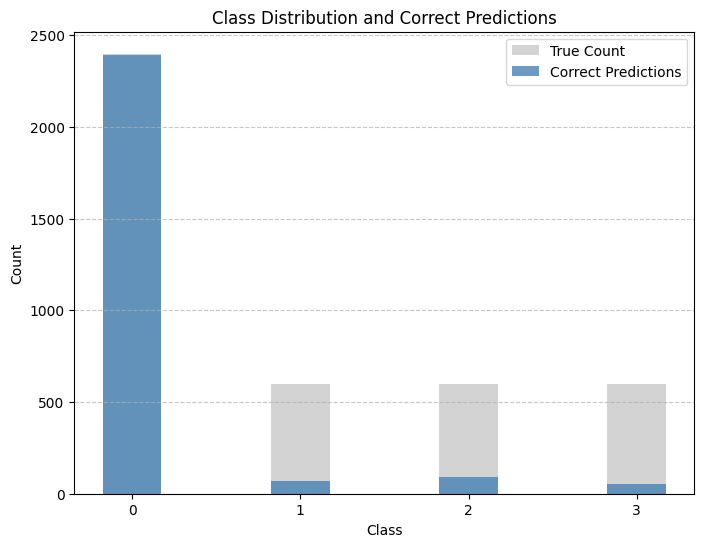

In [41]:
# Частота встречаемости классов и правильно классифицированных
class_counts = np.bincount(Ytest)
correct_predictions = np.array([cm_knn[i, i] for i in range(len(class_labels))])

plt.figure(figsize=(8, 6))
bar_width = 0.35
x = np.arange(len(class_labels))

# Полосы для общего числа примеров и правильно предсказанных
plt.bar(x, class_counts, width=bar_width, label="True Count", color="lightgrey")
plt.bar(x, correct_predictions, width=bar_width, label="Correct Predictions", color="steelblue", alpha=0.8)

plt.xticks(x, class_labels)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution and Correct Predictions")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Теперь посмотрим на тестовый набор данных

## Desicion Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
import joblib  # Импортируем библиотеку joblib для сохранения модели

# Параметры для оптимизации
param_grid = {
    'criterion': ['gini', 'entropy'],  # Критерии разделения
    'max_depth': [None, 15, 20],  # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10],  # Минимальное количество образцов для разбиения
    'min_samples_leaf': [1, 2]  # Минимальное количество образцов в листе
}

# Создаем модель Decision Tree
dt_model = DecisionTreeClassifier()

# Настройка GridSearchCV
dt_cv = GridSearchCV(dt_model, param_grid, scoring='f1_micro', cv=3, n_jobs=-1)

# Обучение модели
dt_cv.fit(Xtrain, Ytrain)

# Результаты
print("Tuned hyperparameters (best parameters):", dt_cv.best_params_)
print("Best micro-averaged F1 score:", dt_cv.best_score_)


# Сохранение лучшей модели на диск
best_dt_model = dt_cv.best_estimator_
joblib.dump(best_dt_model, "best_dt_model.pkl")
print("Лучшая модель Decision сохранена в файл best_dt_model.pkl.")



Tuned hyperparameters (best parameters): {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best micro-averaged F1 score: 0.7120412060381257
Лучшая модель Decision сохранена в файл best_dt_model.pkl.


In [43]:
# Предсказание на тестовой выборке
Ypred_dt = best_dt_model.predict(Xtest)

# # Сохранение лучшей модели на диск
# best_dt_model = dt_cv.best_estimator_
# joblib.dump(best_dt_model, "best_decision_tree_model.pkl")
# print("Лучшая модель Decision Tree сохранена в файл best_decision_tree_model.pkl.")

# Метрики
precision_micro = precision_score(Ytest, Ypred_dt, average='micro', zero_division=0)
recall_micro = recall_score(Ytest, Ypred_dt, average='micro', zero_division=0)
f1_micro = f1_score(Ytest, Ypred_dt, average='micro', zero_division=0)

# Вывод метрик
print("\nMetrics (Micro Averaging):")
print(f"Precision (micro): {precision_micro:.4f}")
print(f"Recall (micro): {recall_micro:.4f}")
print(f"F1-Score (micro): {f1_micro:.4f}")

# Отчет по классам
print("\nClassification Report:")
print(classification_report(Ytest, Ypred_dt, zero_division=0))


Metrics (Micro Averaging):
Precision (micro): 0.7267
Recall (micro): 0.7267
F1-Score (micro): 0.7267

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2400
           1       0.49      0.51      0.50       600
           2       0.48      0.47      0.47       600
           3       0.42      0.34      0.38       600

    accuracy                           0.73      4200
   macro avg       0.57      0.57      0.57      4200
weighted avg       0.72      0.73      0.72      4200



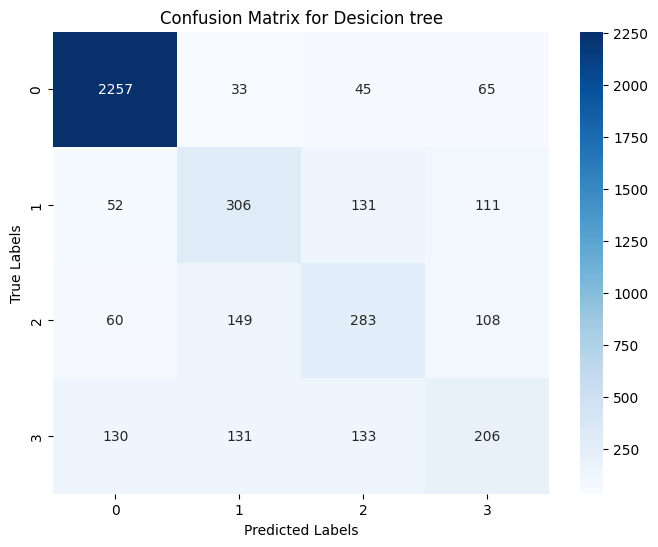

In [44]:
# Матрица путаницы
cm_dt = confusion_matrix(Ytest, Ypred_dt)
class_labels = np.unique(Ytest)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix for Desicion tree")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

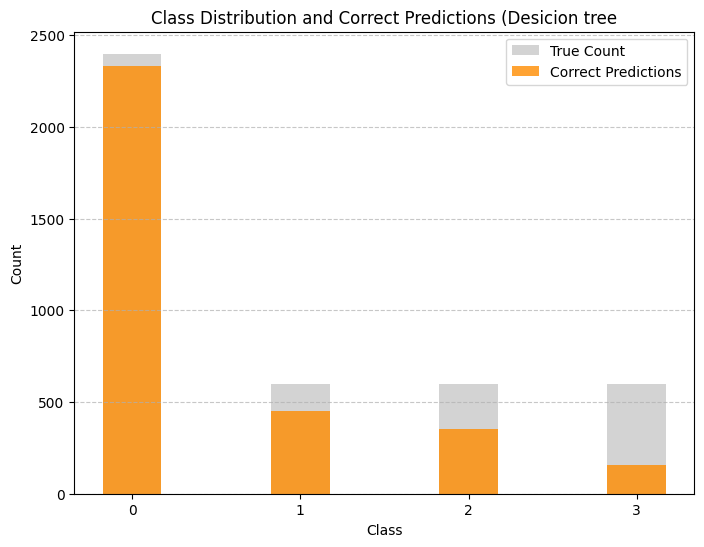

In [45]:
# Частота встречаемости классов и правильно классифицированных
class_counts_dt = np.bincount(Ytest)
correct_predictions_rf = np.array([cm_rf[i, i] for i in range(len(class_labels))])

plt.figure(figsize=(8, 6))
bar_width = 0.35
x = np.arange(len(class_labels))

# Полосы для общего числа примеров и правильно предсказанных
plt.bar(x, class_counts_dt, width=bar_width, label="True Count", color="lightgrey")
plt.bar(x, correct_predictions_rf, width=bar_width, label="Correct Predictions", color="darkorange", alpha=0.8)

plt.xticks(x, class_labels)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution and Correct Predictions (Desicion tree")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Сетка гиперпараметров
grid_rf = {
    'n_estimators': [100, 200],  # Количество деревьев
    'max_depth': [None, 10, 20],    # Глубина деревьев
    'min_samples_split': [2, 5, 10],  # Минимальный размер выборки для разделения
    'criterion': ['gini', 'entropy']  # Критерий разбиения
}

# Создание модели
rf = RandomForestClassifier(random_state=42)

# Настройка GridSearchCV
rf_cv = GridSearchCV(
    rf,
    grid_rf,
    scoring='f1_micro',
    cv=3,
    n_jobs=-1,
    verbose=1
)

# Обучение модели
rf_cv.fit(Xtrain, Ytrain)

# Вывод лучших параметров и результата
print("Tuned hyperparameters (best parameters):", rf_cv.best_params_)
print("Best micro-averaged F1 score:", rf_cv.best_score_)

# Сохранение лучшей модели на диск
best_rf_model = rf_cv.best_estimator_
joblib.dump(best_rf_model, "best_rf_model.pkl")
print("Лучшая модель Random Forest сохранена в файл best_rf_model.pkl.")



Fitting 3 folds for each of 36 candidates, totalling 108 fits
Tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best micro-averaged F1 score: 0.7781635314341434
Лучшая модель Random Forest сохранена в файл best_rf_model.pkl.


In [17]:
# Прогнозы
Ypred_rf = rf_cv.best_estimator_.predict(Xtest)

# Метрики (микро-усредненные)
precision_micro_rf = precision_score(Ytest, Ypred_rf, average='micro', zero_division=0)
recall_micro_rf = recall_score(Ytest, Ypred_rf, average='micro', zero_division=0)
f1_micro_rf = f1_score(Ytest, Ypred_rf, average='micro', zero_division=0)

print("\nMetrics (Micro Averaging):")
print(f"Precision (micro): {precision_micro_rf:.4f}")
print(f"Recall (micro): {recall_micro_rf:.4f}")
print(f"F1-Score (micro): {f1_micro_rf:.4f}")

# Отчет по классам
print("\nClassification Report:")
print(classification_report(Ytest, Ypred_rf, zero_division=0))



Metrics (Micro Averaging):
Precision (micro): 0.7843
Recall (micro): 0.7843
F1-Score (micro): 0.7843

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2400
           1       0.60      0.75      0.67       600
           2       0.57      0.59      0.58       600
           3       0.57      0.26      0.36       600

    accuracy                           0.78      4200
   macro avg       0.66      0.64      0.64      4200
weighted avg       0.77      0.78      0.77      4200



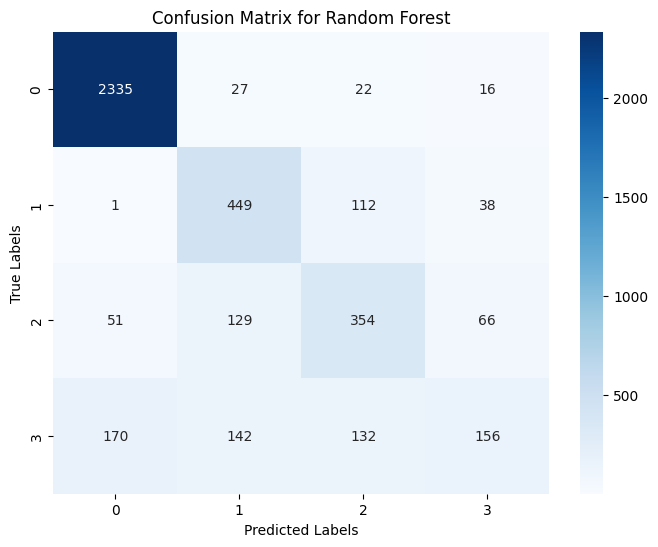

In [18]:
# Матрица путаницы
cm_rf = confusion_matrix(Ytest, Ypred_rf)
class_labels = np.unique(Ytest)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

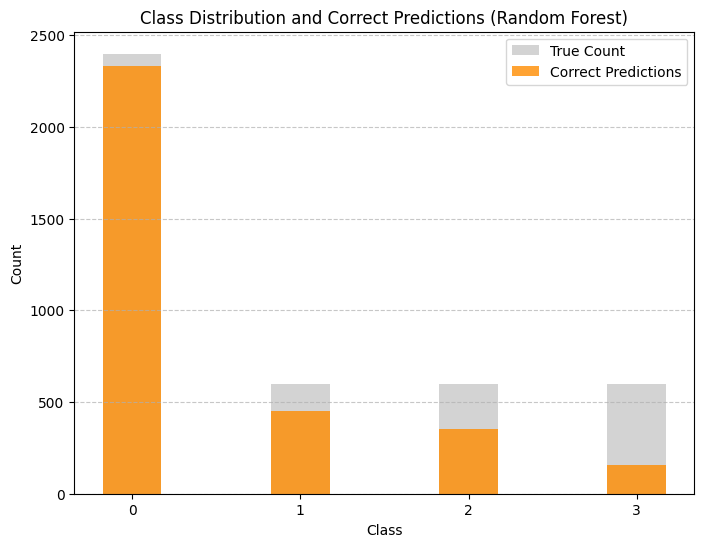

In [19]:
# Частота встречаемости классов и правильно классифицированных
class_counts_rf = np.bincount(Ytest)
correct_predictions_rf = np.array([cm_rf[i, i] for i in range(len(class_labels))])

plt.figure(figsize=(8, 6))
bar_width = 0.35
x = np.arange(len(class_labels))

# Полосы для общего числа примеров и правильно предсказанных
plt.bar(x, class_counts_rf, width=bar_width, label="True Count", color="lightgrey")
plt.bar(x, correct_predictions_rf, width=bar_width, label="Correct Predictions", color="darkorange", alpha=0.8)

plt.xticks(x, class_labels)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution and Correct Predictions (Random Forest)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<font color=#c30>**[0.5]**</font> Justify the parameters grid for each model. What number of cross-validation folds did you use? Why?

Your answer:

## Interpretation <font color=#c30>**[3.5]**</font>

<font color=#c30>**[0.75]**</font> Use test set to rank optimized models. Describe and interpret results.


<font color=#c30>**[0.75]**</font> For the model type of your choice, construct and interpret ROC curves (on the same figure) and calculate ROC AUC for:
  *  each class according to One-Vs-Rest classifier scheme
  *  micro-/macro-averaged OvR

  Use this: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#plot-all-ovr-roc-curves-together

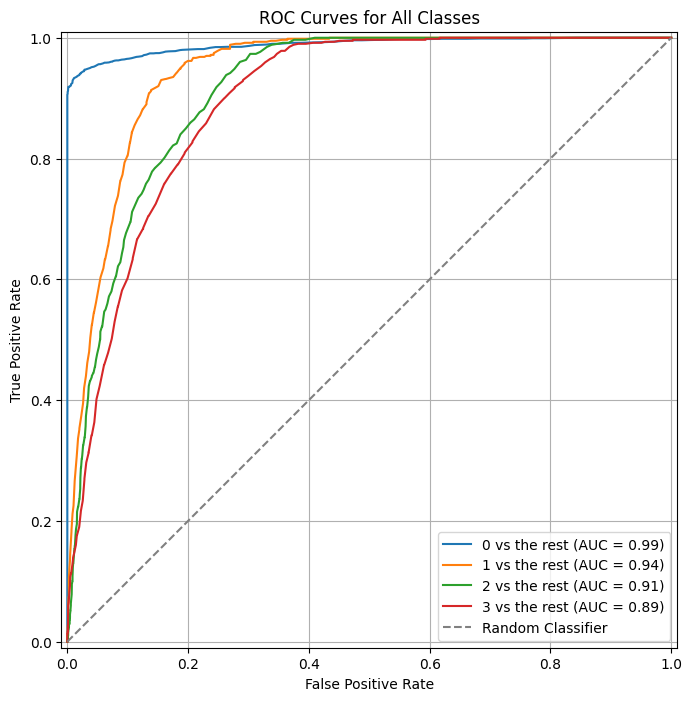

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import joblib

# Загрузка модели из .pkl файла
model = joblib.load("best_rf_model.pkl")

# Предсказания на тестовых данных (вероятности для каждого класса)
y_score = model.predict_proba(Xtest)

# One-hot кодирование для y_test
label_binarizer = LabelBinarizer().fit(Ytrain)
y_onehot_test = label_binarizer.transform(Ytest)

# Строим ROC кривые для всех классов
plt.figure(figsize=(10, 8))

# Построение ROC-кривой для каждого класса (One-vs-Rest)
for class_id, class_name in enumerate(label_binarizer.classes_):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"{class_name} vs the rest",
        ax=plt.gca()
    )

# Добавление диагональной пунктирной линии для случайного классификатора
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

# Настройки графика
plt.title("ROC Curves for All Classes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.grid()
plt.show()



<font color=#c30>**[1]**</font> Write a custom function that plots ROC curve and calculates ROC AUC.

  It should take as an input:
 * Ground-truth values for the class.
 * Probabilities predicted by the model.

  Don't use sklearn in-built functions that calculate confusion matrix values and TPR/FPR.

 *Hint: use `numpy.trapz` to calculate AUC.*

  Compare with results of sklearn implementationt.
  

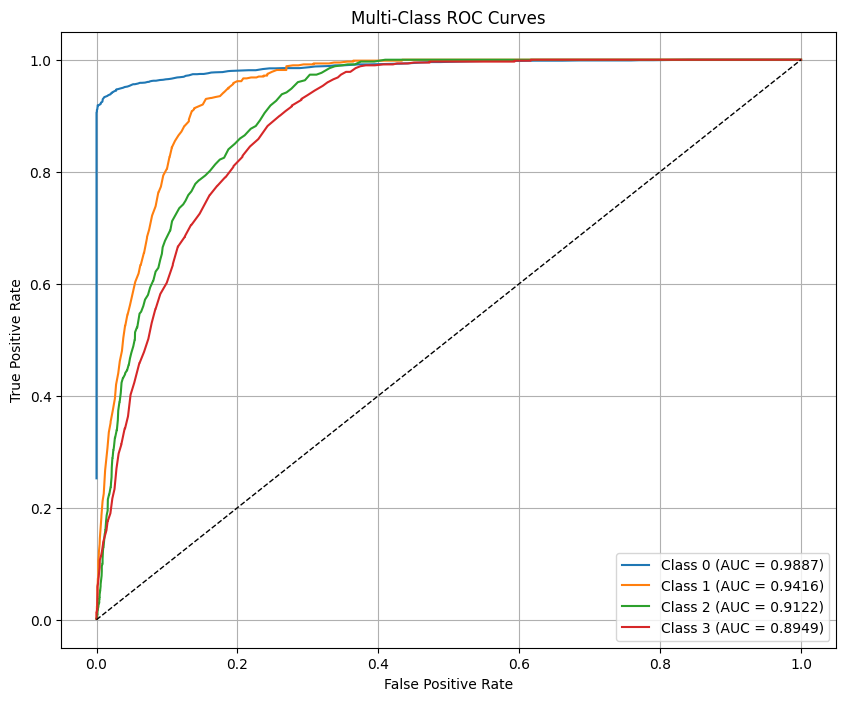

Class 0 AUC: 0.9887
Class 1 AUC: 0.9416
Class 2 AUC: 0.9122
Class 3 AUC: 0.8949


In [32]:
def custom_multiclass_roc_curve(y_true, y_scores, n_classes):
    """
    Построение ROC-кривых и расчет AUC для многоклассовой задачи (один против всех).

    Параметры:
        y_true (array-like): Истинные метки классов (integer labels).
        y_scores (array-like): Предсказанные вероятности для каждого класса (размер [n_samples, n_classes]).
        n_classes (int): Число классов.

    Возвращает:
        roc_curves (list): Список ROC-кривых для каждого класса (fpr, tpr).
        auc_scores (list): AUC для каждого класса.
    """
    from sklearn.preprocessing import label_binarize

    # Бинаризация меток классов
    y_true_binarized = label_binarize(y_true, classes=range(n_classes))

    roc_curves = []
    auc_scores = []

    for i in range(n_classes):
        # ROC для текущего класса
        fpr = []
        tpr = []
        thresholds = np.unique(y_scores[:, i])[::-1]  # Пороговые значения

        tp = 0
        fp = 0
        fn = np.sum(y_true_binarized[:, i])  # Все положительные примеры
        tn = y_true_binarized.shape[0] - fn  # Все отрицательные примеры

        for threshold in thresholds:
            tp = np.sum((y_scores[:, i] >= threshold) & (y_true_binarized[:, i] == 1))
            fp = np.sum((y_scores[:, i] >= threshold) & (y_true_binarized[:, i] == 0))
            fn = np.sum((y_scores[:, i] < threshold) & (y_true_binarized[:, i] == 1))
            tn = np.sum((y_scores[:, i] < threshold) & (y_true_binarized[:, i] == 0))

            tpr.append(tp / (tp + fn) if (tp + fn) > 0 else 0)
            fpr.append(fp / (fp + tn) if (fp + tn) > 0 else 0)

        tpr.append(1)
        fpr.append(1)

        # Вычисление AUC
        auc = np.trapz(tpr, fpr)
        roc_curves.append((fpr, tpr))
        auc_scores.append(auc)

    return roc_curves, auc_scores

# Получение вероятностей для каждого класса
y_scores_multiclass = rf_cv.best_estimator_.predict_proba(Xtest)

# Число классов
n_classes = len(np.unique(Ytest))

# Построение ROC-кривых и расчет AUC
roc_curves, auc_scores = custom_multiclass_roc_curve(Ytest, y_scores_multiclass, n_classes)

# Визуализация
plt.figure(figsize=(10, 8))
for i, (fpr, tpr) in enumerate(roc_curves):
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc_scores[i]:.4f})")
plt.plot([0, 1], [0, 1], "k--", lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curves")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Вывод AUC для каждого класса
for i, auc in enumerate(auc_scores):
    print(f"Class {i} AUC: {auc:.4f}")


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

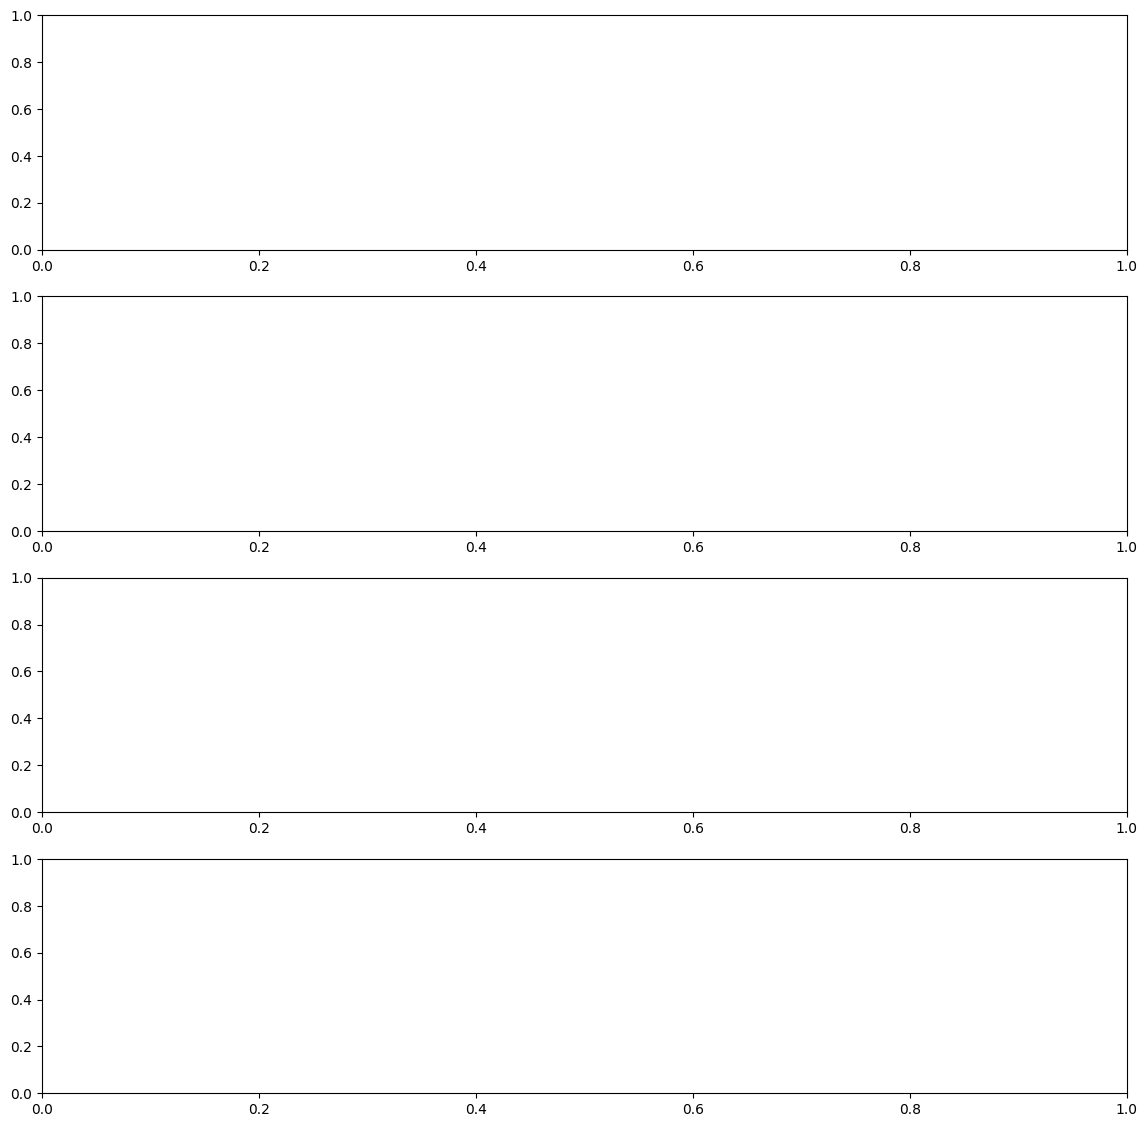

In [46]:
# Extract feature importances for each class
if hasattr(model, 'estimators_'):  # Check if the model is a OneVsRestClassifier
    FI_logreg = []
    for estimator in model.estimators_:
        if hasattr(estimator, 'feature_importances_'):  # For models like RandomForest or CatBoost
            FI_logreg.append(estimator.feature_importances_)
        elif hasattr(estimator, 'coef_'):  # For models like LogisticRegression
            FI_logreg.append(estimator.coef_[0])  # Assuming binary classification
        else:
            raise ValueError("Base estimator does not have feature importance attributes.")
    FI_logreg = np.array(FI_logreg)
else:
    raise ValueError("The model does not support extracting feature importances.")

# Config
K = 10  # Number of top features
class_names = ["ATAC-seq", "CEBPB", "EP300", "HES2"]
colors = sns.color_palette("husl", n_colors=len(class_names))

# Visualization
fig, axs = plt.subplots(len(class_names), 1, figsize=(14, 14))

for i, class_name in enumerate(class_names):
    # Sort features by importance
    order_i = np.argsort(-FI_logreg[i])  # Descending order of importance
    FI_values_top = FI_logreg[i][order_i][:K]  # Top K feature importances
    features_top = [X.columns[j] for j in order_i[:K]]  # Map feature indices to column names in X

    # Create bar plot for top K features
    sns.barplot(x=features_top, y=FI_values_top, color=colors[i], ax=axs[i])
    axs[i].set_title(f"Top {K} important features for {class_name}")
    axs[i].set_xlabel("")
    axs[i].set_ylabel("Feature Importance")
    axs[i].set_xticklabels(features_top, rotation=45)

# Adjust layout
plt.subplots_adjust(hspace=0.5)
plt.show()


<font color=#c30>**[1]**</font> Interpret features learned by each model (where applicable). Then, compare them to known TF motifs (search them online).


In [ ]:
# Your code....

# Extra points <font color=#c30>**[1.5]**</font>

In this homework, you have freedom to choose any of two tasks to earn extra points. Completing one will grant you 1.5 points. Completing both will not grant you more.


## Task 1

<font color=#c30>**[1.5]**</font>  Implement your own version of the random forest algorithm, and compare results with the sklearn version using your dataset from this homework:

* Write a brief explanation of how Random Forest works and how will you implement the algorithm in terms of python classes.
* If you don't know what a python class is, I recommend you looking at some simple explanations, like this one: https://www.w3schools.com/python/python_classes.asp
Think through:
  * What do you need to iniate an object of RF class
  * Which parameters and data should be stored in `self.` attributes of each class instance
  * What inputs and outputs are for each built-in class function

* Write a python class for your Random Forest algorithm. Include `__init__` method (class constructor that is called each time you create an object of class), `fit` method that trains RF according to input data and stores it inside the class instance, and `predict` method which will utilize trained trees to predict class labels for input data.
  * You don't have to implement your own DecisionTree, use sklearn DecisionTree implementation instead.

* Think of a way to utilize trained trees to learn feature importances. To do so, inside your class write a function that will aggregate importances from trained DecisionTrees, and store the final importances in `self.feature_importances` attribute.

* Make sure to demonstrate the result by creating an instance of your class, fitting it with train data, predicting test data, making a barplot of feature importances, and comparing everything with sklearn implementation (using classification metrics of your choice). A code snippet for this is presented below.

In [ ]:
class ExampleForest:
  def __init__(self, ...):
    # Parameters/Data structures are defined here

  def fit(self, ...):
    # Train DecisionTrees(from sklearn) here and save them inside class

  def predict(self, ...):
    # Make predictions using trained Trees and return result

    return ...

SyntaxError: invalid syntax (<ipython-input-26-fa492c84efaa>, line 2)

In [ ]:
# 1) Showcase your class in action by making predictions on TFs dataset
# 2) Plot feature importances stored in .feature_importances attribute of your class
# 3) Do the same with sklearn implementation of RF (same hyperparams) and compare

## Task 2

If you chose this task, then it seems you don't mind going through both HW-4 and HW-5 a second time.

![img](http://i0.kym-cdn.com/entries/icons/original/000/017/886/download.jpg)

Now it's time to do the hard testing for your trained models! Find another tissue/cell line where we have ATAC-seq and the same set of ChIP-seq experiments available.

Then you need to do the following:

<font color=#c30>**[0.15]**</font>  Download ATAC-seq peaks, extract sequences and predict regions that each TF will bind.

<font color=#c30>**[1]**</font>  Download ChIP-seq peaks, intersect with the ATAC-seq and compare them to the ML predictions. Next, calculate standard classification metrics (per-class and then macro averaged): $F_1$, precision, recall, accuracy. Drop regions thar overlap between multiple ChIP-seq experiments (like you did for the training).

<font color=#c30>**[0.35]**</font>  Which model was the best in this scenario? Do we have any other criteria to rank models except for performance? What model would you use for real studies? Why?

In [ ]:
# Your code....